In [49]:
# Q1: Load dataset
import pandas as pd

# Load the following datasets
df = pd.read_csv("/content/EmployeeAttrition.csv")

# Show first few columns and rows
print("Columns in dataset:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

# Check missing values in the dataset
print("\nMissing values:\n", df.isnull().sum())


Columns in dataset:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

First 5 rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_R

Dataset shape after cleaning: (1470, 35)
Attrition Rate: 16.12%

 Average Monthly Income by Attrition:
 Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64

 Average Age by Attrition:
 Attrition
0    37.561233
1    33.607595
Name: Age, dtype: float64

 Correlation:
                     Age  MonthlyIncome  Attrition
Age            1.000000       0.497855  -0.159205
MonthlyIncome  0.497855       1.000000  -0.159840
Attrition     -0.159205      -0.159840   1.000000


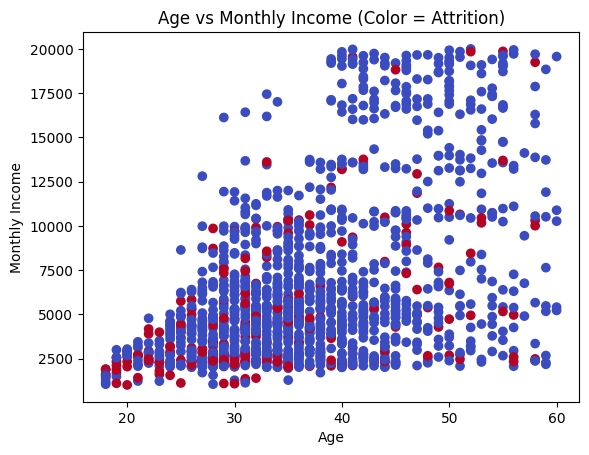

In [50]:
# Q2: Clean the data and perform a quick EDA
import matplotlib.pyplot as plt

# Remove space from names of the colums
df.rename(columns=lambda x: x.strip(), inplace=True)

# Convert Attrition column to numbers where Yes is 1 and No is 0
df["Attrition"] = df["Attrition"].astype(str).str.strip()
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Drop the rows which has missing values
df = df.dropna(subset=["Attrition", "Age", "MonthlyIncome"])

# Display the shape of the data
print("Dataset shape after cleaning:", df.shape)

#EDA on the 4
# 1. Rate of Attrition
print("Attrition Rate: {:.2f}%".format(df["Attrition"].mean() * 100))

# 2. The monthly income average
print("\n Average Monthly Income by Attrition:\n", df.groupby("Attrition")["MonthlyIncome"].mean())

# 3. Age Average
print("\n Average Age by Attrition:\n", df.groupby("Attrition")["Age"].mean())

# 4. Key feature correlation
print("\n Correlation:\n", df[["Age", "MonthlyIncome", "Attrition"]].corr())

# Show the simple scatter plot
plt.scatter(df["Age"], df["MonthlyIncome"], c=df["Attrition"], cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Age vs Monthly Income (Color = Attrition)")
plt.show()


In [51]:
# Q3: KNN model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Select the following features and variable that is the target
X = df[["Age", "MonthlyIncome"]]
y = df["Attrition"]

# Split the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value between 1 and 11
best_k, best_score = 1, 0
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score, best_k = score, k

print("Best k:", best_k)

# Trains and tests the final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Best k: 5

Confusion Matrix:
 [[359   5]
 [ 68   9]]
Accuracy: 0.8344671201814059


In [52]:
# Q4: Tree decision model
from sklearn.tree import DecisionTreeClassifier

# We now train the model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Predictions about the model
y_pred_dt = dt.predict(X_test)

# Evaluate the accuracy and matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



Confusion Matrix:
 [[304  60]
 [ 59  18]]
Accuracy: 0.7301587301587301


In [53]:
# Q5: Tune Decision Tree hyperparameters
best_depth, best_acc = 0, 0

# Try different depths of the tree
for depth in range(2, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_depth = depth

# We train the best model
dt_tuned = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
dt_tuned.fit(X_train, y_train)
y_pred_dt_tuned = dt_tuned.predict(X_test)

# Evaluate best dept, confusion and accuracy
print("Best max_depth:", best_depth)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))


Best max_depth: 2

Confusion Matrix:
 [[364   0]
 [ 77   0]]
Accuracy: 0.8253968253968254


In [54]:
# Q6: Compare the models
print("Model Comparison:")
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))


Model Comparison:
KNN Accuracy: 0.8344671201814059
Decision Tree Accuracy: 0.7301587301587301
Tuned Decision Tree Accuracy: 0.8253968253968254
